# Binary classifier of Spurious Closure of DHSV

This is an **example** of how to use the 3W toolkit, a software package written in Python 3 that contains resources that make the following easier:

* 3W dataset overview generation;
* Experimentation and comparative analysis of Machine Learning-based approaches and algorithms for specific problems related to undesirable events that occur in offshore oil wells during their respective production phases;
* Standardization of key points of the Machine Learning-based algorithm development pipeline.

The 3W toolkit and the 3W dataset are major resources that compose the 3W project, a pilot of a Petrobras' program called [Conexões para Inovação - Módulo Open Lab](https://prd.hotsitespetrobras.com.br/pt/nossas-atividades/tecnologia-e-inovacao/conexoes-para-inovacao/) that promotes experimentation of Machine Learning-based approaches and algorithms for specific problems related to undesirable events that occur in offshore oil wells.

# 1. Introduction

This [Jupyter Notebooks](https://jupyter.org/) presents a **basic** example of how to use the 3W toolkit's resources to develop an experiment for a specific problem.

You can adapt this example to experiment other approaches. To do so, follow the instructions included in the following codes as comments.

**IMPORTANT**: in order to experiment very different approaches with other Machine Learning pipelines, we need to evolve the 3W toolkit first. Your help with this is greatly appreciated.

# 2. Imports and Configurations

In [1]:
import sys
import os
import numpy as np

sys.path.append(os.path.join('..','..','..'))
import toolkit as tk

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# 3. Criating an Experiment for a Specific Problem

A specific event type defined in the `dataset\dataset.ini` must be used as `event_name` when we create a experiment.

In [2]:
experiment = tk.Experiment(event_name="SPURIOUS_CLOSURE_OF_DHSV")

# 4. Setting up Folds for an Experiment

As the 3W toolkit defines and standardizes a number of things, we don't need to worry about labels and IDs associated with the specific event type chosen, number of folds, and which folds consider which instances.

In [3]:
event_labels = list(experiment.event_labels.values())
event_labels_idx = {v: i for i, v in enumerate(event_labels)}
fold: tk.EventFold
folds: tk.EventFolds = experiment.folds()

Loading instances <●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●●> 150/150 [100%] in 8.1s (18.51/s)                           


# 5. Executing an Experiment

You can see below that the 3W toolkit has methods to extract samples for both training and testing, and also to calculate metrics for each fold.

In [4]:
for fold in folds:
    X_train, y_train = fold.extract_training_samples()
    X_test = fold.extract_test_samples()
    
    # This is the section that contains the heart of this basic example.
    # 
    # Note that this basic example learns the frequency of each label 
    # in the training set and always uses these frequencies as probabilities
    # in the testing samples (regardless of the samples themselves).
    #  
    # It is interesting to mention that the metrics obtained with this 
    # simple approach seem to be good because of the considerable imbalance 
    # of the 3W dataset that is not addressed by the 3W toolkit.
    #
    # You can modify this section to try other more interesting approaches.
    # All you have to do is generate an array (numpy.ndarray) `y_pred` 
    # with probability estimates for the test samples. For each test sample
    # you need to estimate an array (numpy.ndarray) of probabilities 
    # associated with each label in the order they are in the `event_labels`.
    # So `y_pred` must be an array of arrays.
    #
    #################################################################### 
    y_train_idx = list(map(event_labels_idx.__getitem__, y_train))
    y_bins = np.bincount(y_train_idx) / len(y_train_idx)
    y_pred = np.tile(y_bins, (len(X_test), 1))
    ####################################################################

    fold.calculate_partial_metrics(y_pred, event_labels)

# 6. Printing the Results

The 3W toolkit provides a method for retrieving and presenting the metrics calculated for each fold.

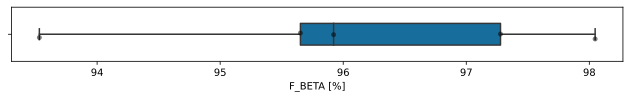

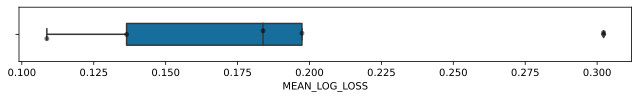

,F_BETA [%],MEAN_LOG_LOSS
FOLD,,
0,93.530575,0.302256
1,95.652174,0.197372
2,97.278197,0.136420
3,98.047260,0.108691
4,95.921818,0.183860
MEAN,96.086005,0.185720
STANDARD DEVIATION,1.550047,0.066459


In [5]:
folds.get_metrics(boxplot=True)